## Objective
- Predict if a customer is happy or not based on the answers they give to questions asked.

## Data
- Y: target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1: my order was delivered on time with values indicating 1 (bad) to 5 (Excellent)
- X2: contents of my order was as I expected with values indicating 1 (bad) to 5 (Excellent)
- X3: I ordered everything I wanted to order with values indicating 1 (bad) to 5 (Excellent)
- X4: I paid a good price for my order with values indicating 1 (bad) to 5 (Excellent)
- X5: I am satisfied with my courier with values indicating 1 (bad) to 5 (Excellent)
- X6: the app makes ordering easy for me with values indicating 1 (bad) to 5 (Excellent)

In [148]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=32bf40f1ed2ed534cc078cf36aa55f34d3bcce41f3cbe74b62d0b5a6ed1967f4
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


## Import Libraries

In [149]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.preprocessing import FunctionTransformer
# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import lime
import lime.lime_tabular

### Read Dataset

In [2]:
ACME_data = pd.read_csv("ACME-HappinessSurvey2020.csv")
df = ACME_data.copy()

### View Dataset

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


### Understanding Shape

In [5]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 126 rows and 7 columns.


### Checking data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


### Fixing data type

In [7]:
categorical_var = ['Y','X1','X2','X3','X4','X5','X6']
for colname in categorical_var:
    df[colname] = df[colname].astype('category')

#checking if properly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       126 non-null    category
 1   X1      126 non-null    category
 2   X2      126 non-null    category
 3   X3      126 non-null    category
 4   X4      126 non-null    category
 5   X5      126 non-null    category
 6   X6      126 non-null    category
dtypes: category(7)
memory usage: 2.3 KB


### Missing Value Check

In [8]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

### Categorical Data Value check

In [9]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

1    69
0    57
Name: Y, dtype: int64



5    65
4    40
3    20
1     1
Name: X1, dtype: int64



3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64



3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64



4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64



4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64



5    57
4    47
3    20
1     1
2     1
Name: X6, dtype: int64





### Dataset Summary

In [10]:
df.describe(include=["category"])

,Y,X1,X2,X3,X4,X5,X6
count,126,126,126,126,126,126,126
unique,2,4,5,5,5,5,5
top,1,5,3,3,4,4,5
freq,69,65,42,55,53,50,57


## EDA

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

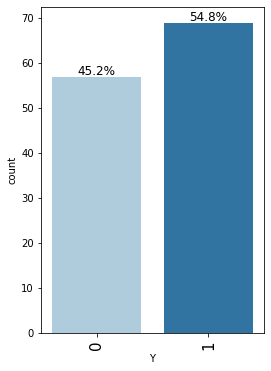

In [12]:
labeled_barplot(df, "Y", perc=True)

- Most customers (54.8%) are happy 

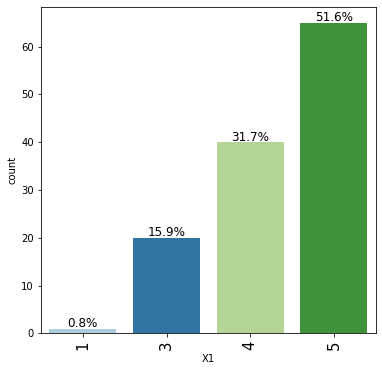

In [13]:
labeled_barplot(df, "X1", perc=True)

- Most customers had their orders delivered on time/are happy with the delivery time of their order

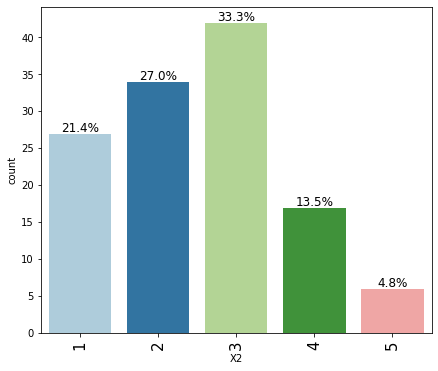

In [14]:
labeled_barplot(df, "X2", perc=True)

- Customers tend to be unhappy with the contents of their orders with 48.4% rating either a 1 or 2

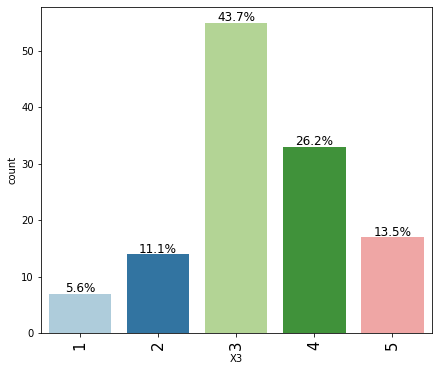

In [15]:
labeled_barplot(df, "X3", perc=True)

- Most customers ordered what they wanted with 39.7% rating a 4 or 5

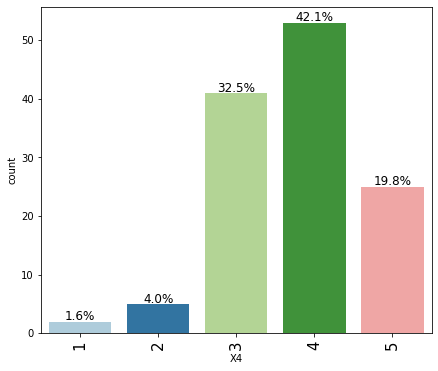

In [16]:
labeled_barplot(df, "X4", perc=True)

- Most customers are happy with the price of what they ordered

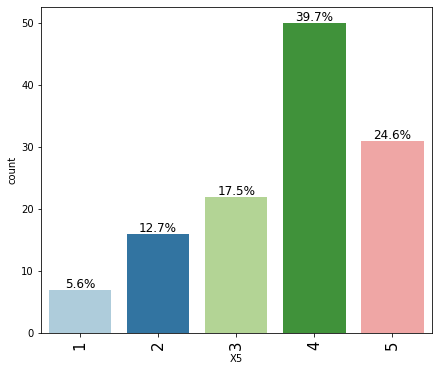

In [17]:
labeled_barplot(df, "X5", perc=True)

- Most customers are happy with their courier

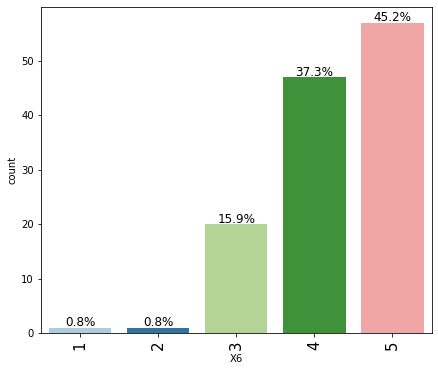

In [18]:
labeled_barplot(df, "X6", perc=True)

- Most customers are happy with how easy the app is to use

## Bivariate Analysis

In [19]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Y     0   1  All
X1              
All  57  69  126
4    24  16   40
5    20  45   65
3    12   8   20
1     1   0    1
------------------------------------------------------------------------------------------------------------------------


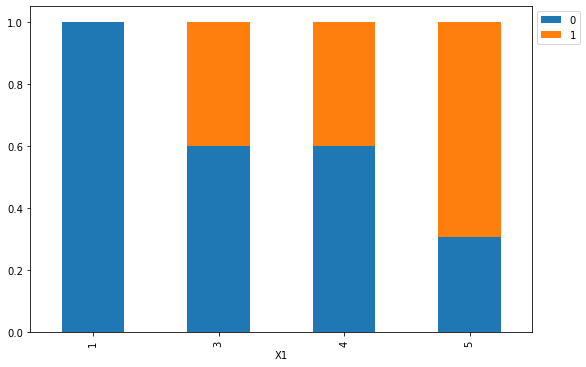

In [20]:
stacked_barplot(df,"X1","Y")

- As rating for delivery on time increases, trend of number of customers happy increases

Y     0   1  All
X2              
All  57  69  126
3    19  23   42
1    13  14   27
2    13  21   34
4    10   7   17
5     2   4    6
------------------------------------------------------------------------------------------------------------------------


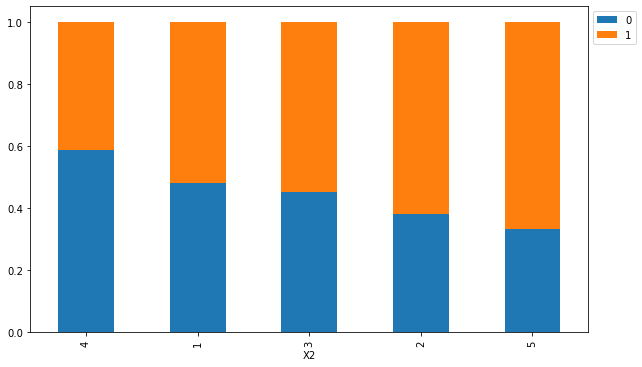

In [21]:
stacked_barplot(df,"X2","Y")

- Hard to see a trend here with rating for contends of order being what was expected.
- Customer satisfaction increases from rating 1 to 2, then decreases from rating 2 to 4 and then increases again at rating 5. Might cause skewing of predictions.

Y     0   1  All
X3              
All  57  69  126
3    29  26   55
4    11  22   33
2     7   7   14
5     6  11   17
1     4   3    7
------------------------------------------------------------------------------------------------------------------------


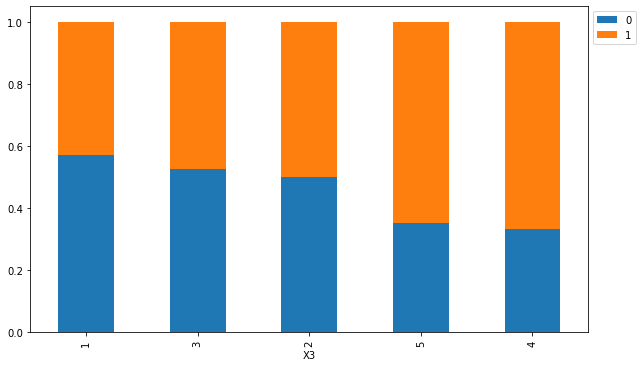

In [22]:
stacked_barplot(df,"X3","Y")

- In regards to customers ordering everything they want to order, number of customers happy tends to increase as  rating increases, with only a slight decrease from ratings 2 to 3 before the trend continues. 

Y     0   1  All
X4              
All  57  69  126
4    23  30   53
3    20  21   41
5    10  15   25
2     4   1    5
1     0   2    2
------------------------------------------------------------------------------------------------------------------------


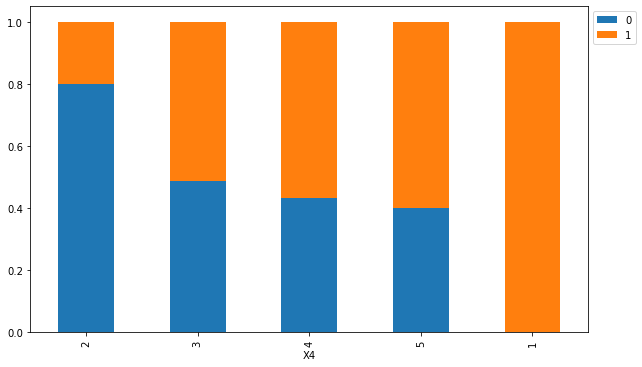

In [23]:
stacked_barplot(df,"X4","Y")

- As customer rating increases, number of customers happy increases regarding paying a good price for order.  The 1 rating is an outlier as there is too little data in that group to make an accurate prediction

Y     0   1  All
X5              
All  57  69  126
4    22  28   50
3    12  10   22
2     9   7   16
5     9  22   31
1     5   2    7
------------------------------------------------------------------------------------------------------------------------


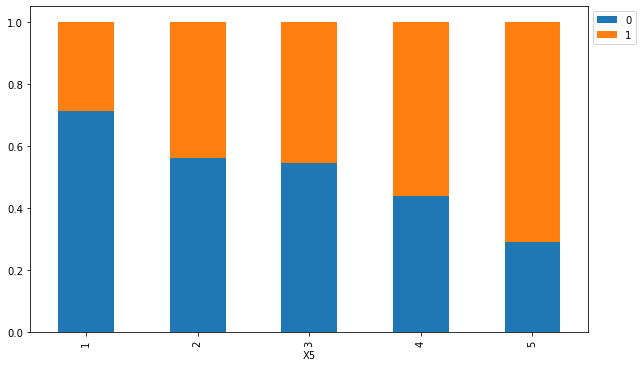

In [24]:
stacked_barplot(df,"X5","Y")

- As customer rating increases regarding satisfaction of courier, number of customers happy tends to increase

Y     0   1  All
X6              
All  57  69  126
5    22  35   57
4    20  27   47
3    14   6   20
2     1   0    1
1     0   1    1
------------------------------------------------------------------------------------------------------------------------


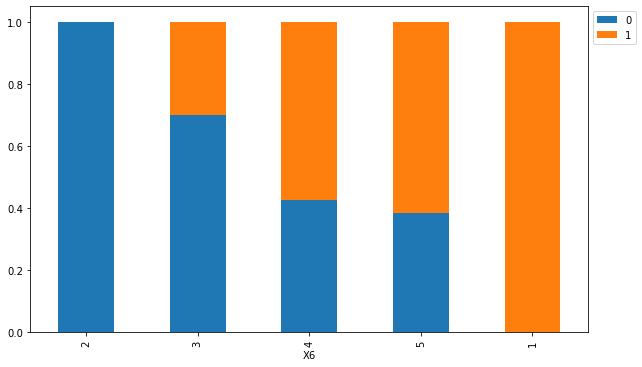

In [25]:
stacked_barplot(df,"X6","Y")

- ratings 1 and 2 have very little data, skewing the predictions, otherwise as customer rating increases for ease of app use to order the number of customers happy tends to increase

### Summary of EDA
#### Data Description:
- All datatypes are category
- Dependent variable is Y which is a category

#### Data Cleaning:
- No Missing Values

### Observations from EDA
- Across most data groups, as rating increases so does customer satisfaction
- There is very little data in the dataset which skews what ratings accurately tend to increase customer satisfaction, there is a high chance this will skew models ability to predict

## Data preparation for modeling

In [26]:
#X = df.drop("Y", axis=1)
#X = pd.get_dummies(X)
#y = df["Y"]

In [27]:
## Potential new dataset where we drop outliers?
df_outliers1 = df.drop(df.index[df['X4'] == 1])
df_outliers2 = df_outliers1.drop(df_outliers1.index[df_outliers1['X6'] == 1])
df_outliers3 = df_outliers2.drop(df_outliers2.index[df_outliers2['X1'] == 1])
X = df_outliers3.drop("Y", axis=1)
X = pd.get_dummies(X)
y = df_outliers3["Y"]


In [28]:
#df_outliers = df.drop(df.index[df['X4'] == 1])
#df_outliers = df_outliers.drop(df_outliers.index[df_outliers['X1'] == 1])
#df_outliers = df_outliers.drop(df_outliers.index[df_outliers['X6'] == 2])
#X = df_outliers.drop("Y", axis=1)
#X = pd.get_dummies(X)
#y = df_outliers["Y"]

In [29]:
#df_outliers.head()

In [30]:
#num_to_display = 10  # defining this up here so it's easy to change later if I want
#for colname in df_outliers.dtypes[df_outliers.dtypes == 'category'].index:
 #   val_counts = df_outliers[colname].value_counts(dropna=False)  # i want to see NA counts
  #  print(val_counts[:num_to_display])
   # if len(val_counts) > num_to_display:
    #    print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    #print('\n\n') # just for more space between 

In [31]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(73, 29) (25, 29) (25, 29)


## Model Building

In [32]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [33]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [34]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

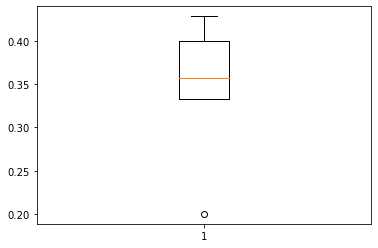

In [35]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training set varies beteween 0.46-0.80 Accuracy

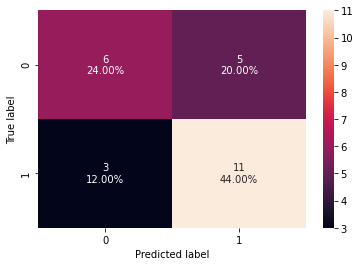

In [36]:
confusion_matrix_sklearn(lr, X_val,y_val)

In [37]:
lr_train_score=model_performance_classification_sklearn(lr, X_train, y_train)
print("Training performance \n",lr_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.684932  0.794872   0.673913  0.729412


In [38]:
lr_val_score=model_performance_classification_sklearn(lr, X_val,y_val)
print("Validation performance \n",lr_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.68  0.785714     0.6875  0.733333


### Decision Tree

In [39]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

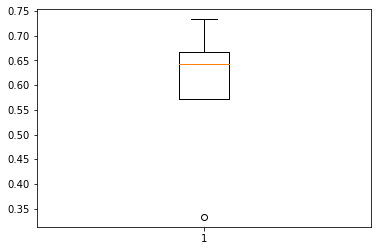

In [40]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=dtree, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

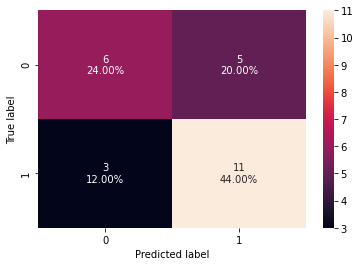

In [41]:
confusion_matrix_sklearn(dtree, X_val,y_val)

In [42]:
dtree_train_score=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.972603  0.948718        1.0  0.973684


In [43]:
dtree_val_score=model_performance_classification_sklearn(dtree, X_val,y_val)
print("Validation performance \n",dtree_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.68  0.785714     0.6875  0.733333


### Bagging

In [44]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

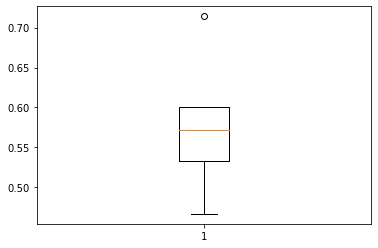

In [45]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=bagging, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [46]:
bagging_train_score=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.945205  0.923077   0.972973  0.947368


In [47]:
bagging_val_score=model_performance_classification_sklearn(bagging, X_val,y_val)
print("Validation performance \n",bagging_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.64  0.714286   0.666667  0.689655


### ADABoost

In [48]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

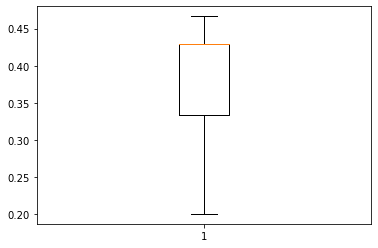

In [49]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=abc, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

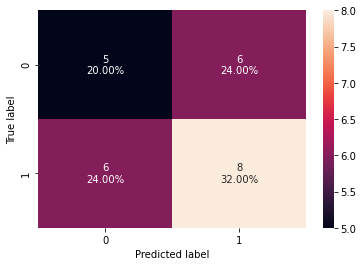

In [50]:
confusion_matrix_sklearn(abc, X_val,y_val)

In [51]:
abc_train_score= model_performance_classification_sklearn(abc, X_train,y_train)
print("Training performance \n",abc_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.657534  0.717949   0.666667  0.691358


In [52]:
abc_val_score= model_performance_classification_sklearn(abc, X_val,y_val)
print("Validation performance \n",abc_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.52  0.571429   0.571429  0.571429


### Gradient Boost

In [53]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

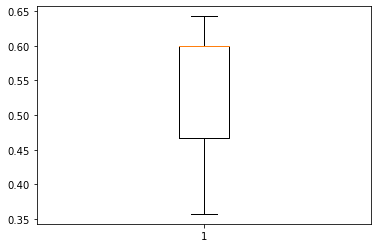

In [54]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=gbc, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

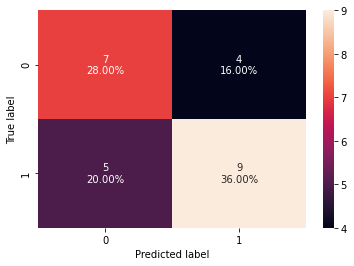

In [55]:
confusion_matrix_sklearn(gbc, X_val,y_val)

In [56]:
gbc_train_score= model_performance_classification_sklearn(gbc, X_train,y_train)
print("Training performance \n",gbc_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.958904  0.948718   0.973684  0.961039


In [57]:
gbc_val_score= model_performance_classification_sklearn(gbc, X_val,y_val)
print("Validation performance \n",gbc_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.64  0.642857   0.692308  0.666667


### XGBoost

In [58]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

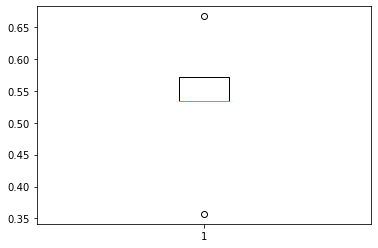

In [59]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=xgb, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

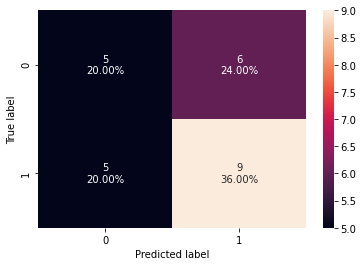

In [60]:
confusion_matrix_sklearn(xgb, X_val,y_val)

In [61]:
xgb_train_score= model_performance_classification_sklearn(xgb, X_train,y_train)
print("Training performance \n",xgb_train_score)

Training performance 
    Accuracy    Recall  Precision    F1
0  0.958904  0.923077        1.0  0.96


In [62]:
xgb_val_score= model_performance_classification_sklearn(xgb, X_val,y_val)
print("Validation performance \n",xgb_val_score)

Validation performance 
    Accuracy    Recall  Precision       F1
0      0.56  0.642857        0.6  0.62069


## Oversampling with smote

In [63]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 39
Before UpSampling, counts of label 'No': 34 

After UpSampling, counts of label 'Yes': 39
After UpSampling, counts of label 'No': 39 

After UpSampling, the shape of train_X: (78, 29)
After UpSampling, the shape of train_y: (78,) 



### Logistic regression over sampling

In [64]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

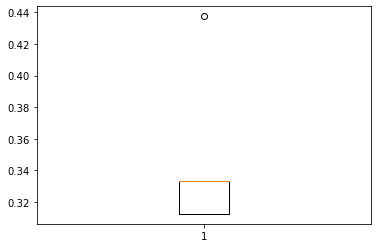

In [65]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

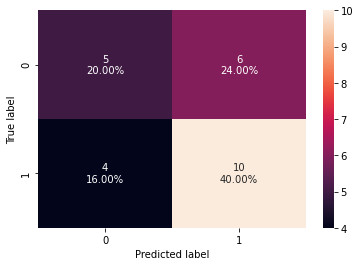

In [66]:
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

In [67]:
lr_over_train_score = model_performance_classification_sklearn(log_reg_over, X_train_over, y_train_over)
print("Training performance \n",lr_over_train_score)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.705128  0.74359   0.690476  0.716049


In [68]:
lr_over_val_score = model_performance_classification_sklearn(log_reg_over, X_val, y_val)
print("Validation performance \n",lr_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0       0.6  0.714286      0.625  0.666667


### Decision Tree Oversampling

In [69]:
dtree_over = DecisionTreeClassifier(criterion='gini',random_state=1)
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

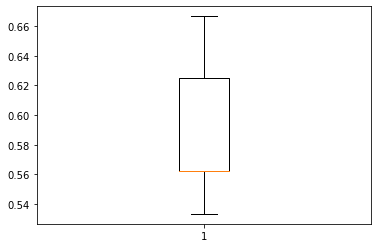

In [70]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=dtree_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

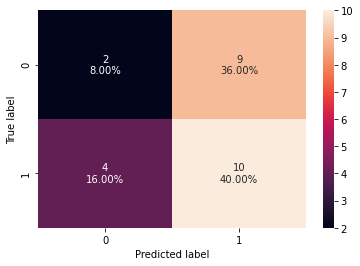

In [71]:
confusion_matrix_sklearn(dtree_over, X_val, y_val)

In [72]:
dtree_over_train_score = model_performance_classification_sklearn(dtree_over, X_train_over, y_train_over)
print("Training performance \n",dtree_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.974359  0.948718        1.0  0.973684


In [73]:
dtree_over_val_score = model_performance_classification_sklearn(dtree_over, X_val, y_val)
print("Validation performance \n",dtree_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.48  0.714286   0.526316  0.606061


###  Bagging Oversampling

In [74]:
bagging_over = BaggingClassifier(random_state=1)
bagging_over.fit(X_train_over,y_train_over)

BaggingClassifier(random_state=1)

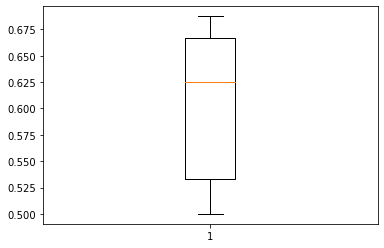

In [75]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

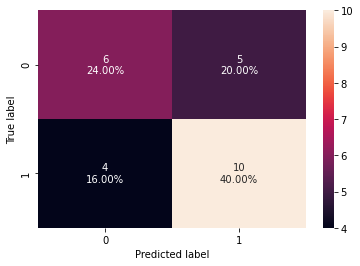

In [76]:
confusion_matrix_sklearn(bagging_over, X_val, y_val)

In [77]:
bagging_over_train_score = model_performance_classification_sklearn(bagging_over, X_train_over, y_train_over)
print("Training performance \n",bagging_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.935897  0.897436   0.972222  0.933333


In [78]:
bagging_over_val_score = model_performance_classification_sklearn(bagging_over, X_val, y_val)
print("Validation performance \n",bagging_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.64  0.714286   0.666667  0.689655


### Adaboost Oversample

In [79]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

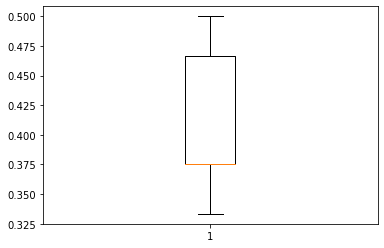

In [80]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=abc_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

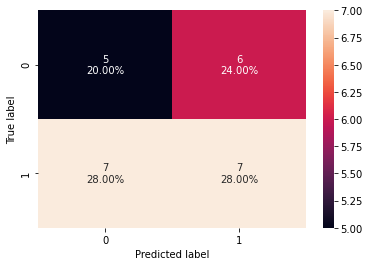

In [81]:
confusion_matrix_sklearn(abc_over, X_val, y_val)

In [82]:
abc_over_train_score = model_performance_classification_sklearn(abc_over, X_train_over, y_train_over)
print("Training performance \n",abc_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.653846  0.641026   0.657895  0.649351


In [83]:
abc_over_val_score = model_performance_classification_sklearn(abc_over, X_val, y_val)
print("Validation performance \n",abc_over_val_score)

Validation performance 
    Accuracy  Recall  Precision        F1
0      0.48     0.5   0.538462  0.518519


### GradientBoost Oversampling

In [84]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

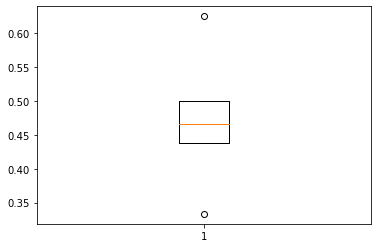

In [85]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=gbc_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

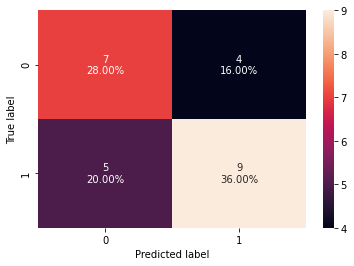

In [86]:
confusion_matrix_sklearn(gbc_over, X_val, y_val)

In [87]:
gbc_over_train_score = model_performance_classification_sklearn(gbc_over, X_train_over, y_train_over)
print("Training performance \n",gbc_over_train_score)

Training performance 
    Accuracy    Recall  Precision     F1
0  0.923077  0.948718   0.902439  0.925


In [88]:
gbc_over_val_score = model_performance_classification_sklearn(gbc_over, X_val, y_val)
print("Validation performance \n",gbc_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.64  0.642857   0.692308  0.666667


### XGB Oversampling

In [89]:
xgb_over = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

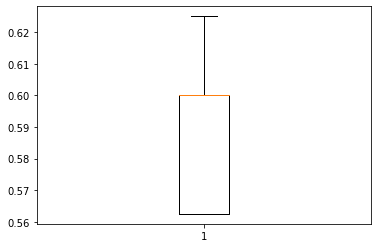

In [90]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=xgb_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

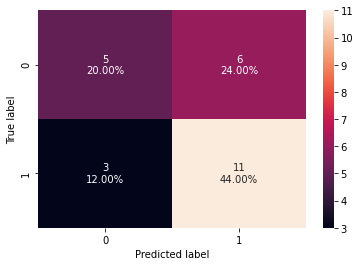

In [91]:
confusion_matrix_sklearn(xgb_over, X_val, y_val)

In [92]:
xgb_over_train_score = model_performance_classification_sklearn(xgb_over, X_train_over, y_train_over)
print("Training performance \n",xgb_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.974359  0.948718        1.0  0.973684


In [93]:
xgb_over_val_score = model_performance_classification_sklearn(xgb_over, X_val, y_val)
print("Validation performance \n",xgb_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.64  0.785714   0.647059  0.709677


### Undersampling using Random Undersampler

In [94]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [95]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes' {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 39
Before Under Sampling, counts of label 'No': 34 

After Under Sampling, counts of label 'Yes' 34
After Under Sampling, counts of label 'No': 34 

After Under Sampling, the shape of train_X: (68, 29)
After Under Sampling, the shape of train_y: (68,) 



### Logistic Regression Under Sampling

In [96]:
lr_un = LogisticRegression(random_state=1)
lr_un.fit(X_train_un,y_train_un)

LogisticRegression(random_state=1)

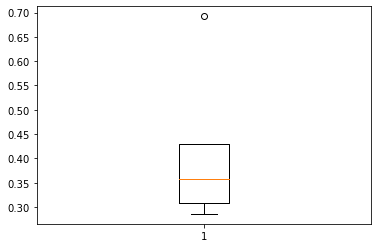

In [97]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=lr_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [98]:
lr_un_train_score = model_performance_classification_sklearn(lr_un, X_train_un, y_train_un)
print("Training performance \n",lr_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.632353  0.588235   0.645161  0.615385


In [99]:
lr_un_val_score = model_performance_classification_sklearn(lr_un, X_val, y_val)
print("Validation performance \n",lr_un_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.68  0.714286   0.714286  0.714286


### Decision Tree under sampling

In [100]:
dtree_un = DecisionTreeClassifier(criterion = "gini", random_state = 1)
dtree_un.fit(X_train_un,y_train_un)

DecisionTreeClassifier(random_state=1)

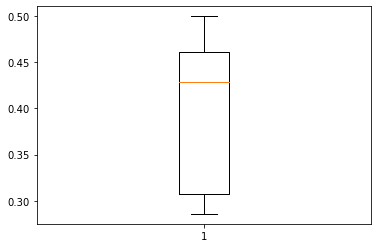

In [101]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=dtree_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [102]:
dtree_un_train_score = model_performance_classification_sklearn(dtree_un, X_train_un, y_train_un)
print("Training performance \n",dtree_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.970588  0.941176        1.0  0.969697


In [103]:
dtree_un_val_score = model_performance_classification_sklearn(dtree_un, X_val, y_val)
print("Validation performance \n",dtree_un_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.68  0.785714     0.6875  0.733333


### Bagging under sampling


In [104]:
bagging_un = BaggingClassifier(random_state=1)
bagging_un.fit(X_train_un,y_train_un)

BaggingClassifier(random_state=1)

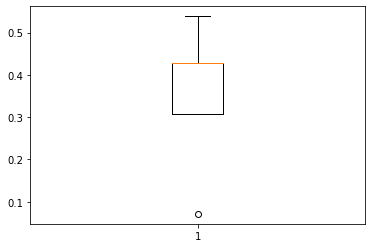

In [105]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [106]:
bagging_un_train_score = model_performance_classification_sklearn(bagging_un, X_train_un, y_train_un)
print("Training performance \n",bagging_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.955882  0.911765        1.0  0.953846


In [107]:
bagging_un_val_score = model_performance_classification_sklearn(bagging_un, X_val, y_val)
print("Validation performance \n",bagging_un_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.64  0.714286   0.666667  0.689655


### ADABoost under sampling

In [108]:
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

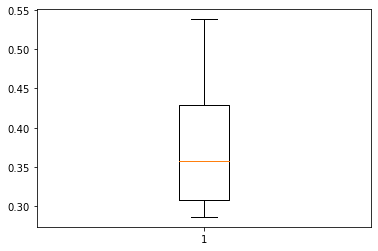

In [109]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=abc_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [110]:
abc_un_train_score = model_performance_classification_sklearn(abc_un, X_train_un, y_train_un)
print("Training performance \n",abc_un_train_score)

Training performance 
    Accuracy    Recall  Precision      F1
0  0.588235  0.529412        0.6  0.5625


In [111]:
abc_un_val_score = model_performance_classification_sklearn(abc_un, X_val, y_val)
print("Validation performance \n",abc_un_val_score)

Validation performance 
    Accuracy  Recall  Precision    F1
0      0.56     0.5   0.636364  0.56


### GradientBoost under sampling

In [112]:
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

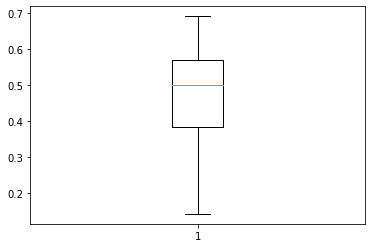

In [113]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=gbc_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [114]:
gbc_un_train_score = model_performance_classification_sklearn(gbc_un, X_train_un, y_train_un)
print("Training performance \n",gbc_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.955882  0.941176   0.969697  0.955224


In [115]:
gbc_un_val_score = model_performance_classification_sklearn(gbc_un, X_val, y_val)
print("Validation performance \n",gbc_un_val_score)

Validation performance 
    Accuracy    Recall  Precision    F1
0      0.72  0.642857   0.818182  0.72


### XGB under sampling

In [116]:
xgb_un = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_un.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

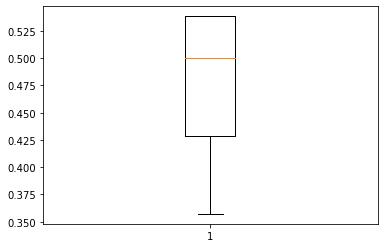

In [117]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=xgb_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [118]:
xgb_un_train_score = model_performance_classification_sklearn(xgb_un, X_train_un, y_train_un)
print("Training performance \n",xgb_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.970588  0.941176        1.0  0.969697


In [119]:
xgb_un_val_score = model_performance_classification_sklearn(xgb_un, X_val, y_val)
print("Validation performance \n",xgb_un_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.72  0.785714   0.733333  0.758621


## Model Comparison

In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lr_train_score.T,lr_over_train_score.T,lr_un_train_score.T,dtree_train_score.T,dtree_over_train_score.T,dtree_un_train_score.T,
     bagging_train_score.T,bagging_over_train_score.T,bagging_un_train_score.T,abc_train_score.T,abc_over_train_score.T,abc_un_train_score.T,
     gbc_train_score.T,gbc_over_train_score.T,gbc_un_train_score.T,xgb_train_score.T,xgb_over_train_score.T,xgb_un_train_score.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversample",
    "Logistic Regression Undersample",
    "Decision Tree Classifier",
    "Decision Tree Oversample",
    "Decision Tree Undersample",
    "Bagging Classifier",
    "Bagging Oversample",
    "Bagging Undersample",
    "AdaBoost Classifier",
    "AdaBoost Oversample",
    "AdaBoost Undersample",
    "Gradient Boost Classifier",
    "Gradient Boost Oversample",
    "Gradient Boost Undersample",
    "XGB Classifier",
    "XGB Oversample",
    "XGB Undersample"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression Oversample,Logistic Regression Undersample,Decision Tree Classifier,Decision Tree Oversample,Decision Tree Undersample,Bagging Classifier,Bagging Oversample,Bagging Undersample,AdaBoost Classifier,AdaBoost Oversample,AdaBoost Undersample,Gradient Boost Classifier,Gradient Boost Oversample,Gradient Boost Undersample,XGB Classifier,XGB Oversample,XGB Undersample
Accuracy,0.684932,0.705128,0.632353,0.972603,0.974359,0.970588,0.945205,0.935897,0.955882,0.657534,0.653846,0.588235,0.958904,0.923077,0.955882,0.958904,0.974359,0.970588
Recall,0.794872,0.743590,0.588235,0.948718,0.948718,0.941176,0.923077,0.897436,0.911765,0.717949,0.641026,0.529412,0.948718,0.948718,0.941176,0.923077,0.948718,0.941176
Precision,0.673913,0.690476,0.645161,1.000000,1.000000,1.000000,0.972973,0.972222,1.000000,0.666667,0.657895,0.600000,0.973684,0.902439,0.969697,1.000000,1.000000,1.000000
F1,0.729412,0.716049,0.615385,0.973684,0.973684,0.969697,0.947368,0.933333,0.953846,0.691358,0.649351,0.562500,0.961039,0.925000,0.955224,0.960000,0.973684,0.969697


In [121]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [lr_val_score.T,lr_over_val_score.T,lr_un_val_score.T,dtree_val_score.T,dtree_over_val_score.T,dtree_un_val_score.T,
     bagging_val_score.T,bagging_over_val_score.T,bagging_un_val_score.T,abc_val_score.T,abc_over_val_score.T,abc_un_val_score.T,
     gbc_val_score.T,gbc_over_val_score.T,gbc_un_val_score.T,xgb_val_score.T,xgb_over_val_score.T,xgb_un_val_score.T],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversample",
    "Logistic Regression Undersample",
    "Decision Tree Classifier",
    "Decision Tree Oversample",
    "Decision Tree Undersample",
    "Bagging Classifier",
    "Bagging Oversample",
    "Bagging Undersample",
    "AdaBoost Classifier",
    "AdaBoost Oversample",
    "AdaBoost Undersample",
    "Gradient Boost Classifier",
    "Gradient Boost Oversample",
    "Gradient Boost Undersample",
    "XGB Classifier",
    "XGB Oversample",
    "XGB Undersample"]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression Oversample,Logistic Regression Undersample,Decision Tree Classifier,Decision Tree Oversample,Decision Tree Undersample,Bagging Classifier,Bagging Oversample,Bagging Undersample,AdaBoost Classifier,AdaBoost Oversample,AdaBoost Undersample,Gradient Boost Classifier,Gradient Boost Oversample,Gradient Boost Undersample,XGB Classifier,XGB Oversample,XGB Undersample
Accuracy,0.680000,0.600000,0.680000,0.680000,0.480000,0.680000,0.640000,0.640000,0.640000,0.520000,0.480000,0.560000,0.640000,0.640000,0.720000,0.560000,0.640000,0.720000
Recall,0.785714,0.714286,0.714286,0.785714,0.714286,0.785714,0.714286,0.714286,0.714286,0.571429,0.500000,0.500000,0.642857,0.642857,0.642857,0.642857,0.785714,0.785714
Precision,0.687500,0.625000,0.714286,0.687500,0.526316,0.687500,0.666667,0.666667,0.666667,0.571429,0.538462,0.636364,0.692308,0.692308,0.818182,0.600000,0.647059,0.733333
F1,0.733333,0.666667,0.714286,0.733333,0.606061,0.733333,0.689655,0.689655,0.689655,0.571429,0.518519,0.560000,0.666667,0.666667,0.720000,0.620690,0.709677,0.758621


Decision tree, Bagging XGB

## Model Tuning

### Decision Tree  Classifier

#### GridSearchCV

In [122]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced")

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned1 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001)

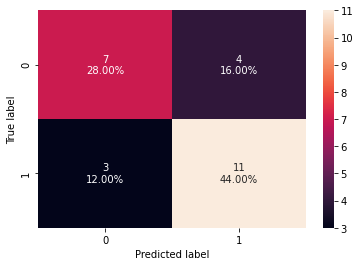

In [123]:
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

In [124]:
dtree_tuned1_train_score = model_performance_classification_sklearn(dtree_tuned1, X_train, y_train)
print("Training performance \n",dtree_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.849315  0.923077   0.818182  0.86747


In [125]:
dtree_tuned1_val_score = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance \n",dtree_tuned1_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.72  0.785714   0.733333  0.758621


#### RandomizedsearchCV

In [126]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = RandomizedSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [127]:
dtree_tuned2_train_score = model_performance_classification_sklearn(dtree_tuned2, X_train, y_train)
print("Training performance \n",dtree_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.849315  0.923077   0.818182  0.86747


In [128]:
dtree_tuned2_val_score = model_performance_classification_sklearn(dtree_tuned2, X_val, y_val)
print("Validation performance \n",dtree_tuned2_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.72  0.785714   0.733333  0.758621


### Bagging  Classifier

#### GridSearchCV

In [129]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight="balanced")
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
scorer = metrics.make_scorer(metrics.accuracy_score)

grid = GridSearchCV(BaggingClassifier(bootstrap=True), param_grid=param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)

bagging_tuned1  = grid.best_estimator_
bagging_tuned1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=1, n_estimators=101)

In [130]:
bagging_tuned1_train_score = model_performance_classification_sklearn(bagging_tuned1, X_train, y_train)
print("Training performance \n",bagging_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.616438  0.435897    0.73913  0.548387


In [131]:
bagging_tuned1_val_score = model_performance_classification_sklearn(bagging_tuned1, X_val, y_val)
print("Validation performance \n",bagging_tuned1_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0       0.6  0.428571       0.75  0.545455


#### RandomizedsearchCV

In [132]:
cl1 = DecisionTreeClassifier(class_weight="balanced")
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
scorer = metrics.make_scorer(metrics.accuracy_score)

grid = RandomizedSearchCV(BaggingClassifier(bootstrap=True), param_distributions=param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)

bagging_tuned2  = grid.best_estimator_
bagging_tuned2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.7, n_estimators=7)

In [133]:
bagging_tuned2_train_score = model_performance_classification_sklearn(bagging_tuned2, X_train, y_train)
print("Training performance \n",bagging_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.945205  0.948718   0.948718  0.948718


In [134]:
bagging_tuned2_val_score = model_performance_classification_sklearn(bagging_tuned2, X_val, y_val)
print("Validation performance \n",bagging_tuned2_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.72  0.785714   0.733333  0.758621


### XGBoost Classifier

#### GridSearchCV

In [135]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)

xgb_tuned1  = grid_cv.best_estimator_
xgb_tuned1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 1} with CV score=0.6019047619047619:
Wall time: 5min 34s


In [136]:
xgb_tuned1_train_score = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance \n",xgb_tuned1_train_score)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.767123     1.0   0.696429  0.821053


In [137]:
# Calculating different metrics on validation set
xgb_tuned1_val_score = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance \n",xgb_tuned1_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.68  0.928571       0.65  0.764706


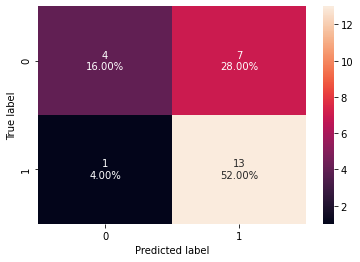

In [138]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

#### RandomizedsearchCV

In [139]:
%%time

# defining model
model = XGBClassifier(eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 2, 'reg_lambda': 5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.6019047619047619:
Wall time: 7.46 s


In [140]:
xgb_tuned2_train_score = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance \n",xgb_tuned2_train_score)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.835616     1.0   0.764706  0.866667


In [141]:
# Calculating different metrics on validation set
xgb_tuned2_val_score = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance \n",xgb_tuned2_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.64  0.857143   0.631579  0.727273


### Comparing Tuned Models

In [142]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_tuned1_train_score.T,
        dtree_tuned2_train_score.T,
        bagging_tuned1_train_score.T,
        bagging_tuned2_train_score.T,
        xgb_tuned1_train_score.T,
        xgb_tuned2_train_score.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Bagging Classifier Tuned with Grid search",
    "Bagging Classifier Tuned with Random Search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Bagging Classifier Tuned with Grid search,Bagging Classifier Tuned with Random Search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.849315,0.849315,0.616438,0.945205,0.767123,0.835616
Recall,0.923077,0.923077,0.435897,0.948718,1.000000,1.000000
Precision,0.818182,0.818182,0.739130,0.948718,0.696429,0.764706
F1,0.867470,0.867470,0.548387,0.948718,0.821053,0.866667


In [143]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_tuned1_val_score.T,
        dtree_tuned2_val_score.T,
        bagging_tuned1_val_score.T,
        bagging_tuned2_val_score.T,
        xgb_tuned1_val_score.T,
        xgb_tuned2_val_score.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Bagging Classifier Tuned with Grid search",
    "Bagging Classifier Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Bagging Classifier Tuned with Grid search,Bagging Classifier Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.720000,0.720000,0.600000,0.720000,0.680000,0.640000
Recall,0.785714,0.785714,0.428571,0.785714,0.928571,0.857143
Precision,0.733333,0.733333,0.750000,0.733333,0.650000,0.631579
F1,0.758621,0.758621,0.545455,0.758621,0.764706,0.727273


## Performance on test set

In [144]:
dtree_tuned1_test_score = model_performance_classification_sklearn(dtree_tuned1, X_test, y_test)
print("Testing performance:")
dtree_tuned1_test_score

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.68,0.857143,0.666667,0.75


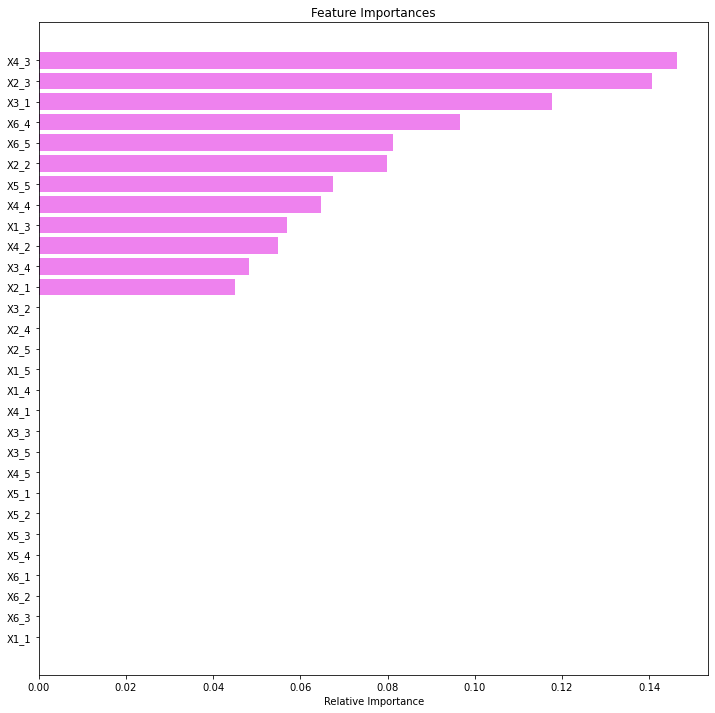

In [145]:
feature_names = X.columns
importances = dtree_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [146]:
xgb_tuned1_test_score = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Testing performance:")
xgb_tuned1_test_score

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.76,1.0,0.7,0.823529


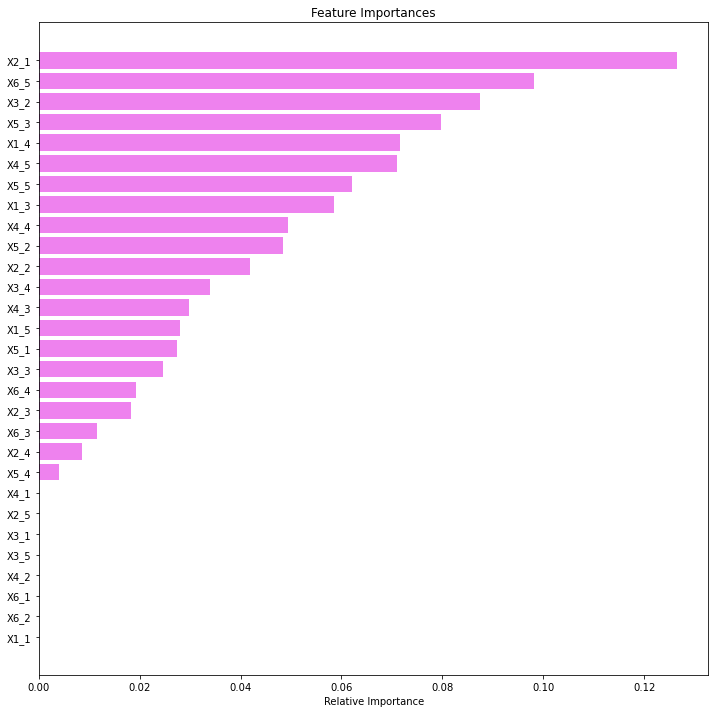

In [147]:
feature_names = X.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [157]:
predict_fn_xgb = lambda x: xgb_tuned1.predict_proba(x).astype(float)

In [163]:
feature_names = list(X2.columns)

In [162]:
X2 = df.drop("Y", axis=1)
y2 = df["Y"]

In [167]:
X_train_lime =X_train.to_numpy(copy=True)

In [168]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_lime,categorical_features = X_train.columns)

In [183]:
observation = 1

In [191]:
exp = explainer.explain_instance(X_val.iloc[observation].astype(int),predict_fn_xgb, num_features=6)
exp.show_in_notebook(show_all=False)